In [1]:
from modules.data_exploration.data_ex import import_data, gen_bulk_data, get_bulk_inst

from modules.build_ml_models.NN_classification import build_model, build_model_seq

from modules.build_ml_models.NN_classification import plot_confusion_matrix,print_classification_report


In [2]:
file_path = 'data/churn.csv'
data_dict = gen_bulk_data(file_path)
data_dict.keys()

dict_keys(['original', 'dropped', 'scaled', 'encoded', 'encoded and scaled', 'scaled and dropped'])

In [3]:
key = 'original'

x_train, x_test, x_val, y_train, y_test, y_val = get_bulk_inst(data_dict, key)

In [4]:
x_train

,state,account_length,area_code,phone_number,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
0,49,172,415,1583,0,0,0,211.7,100,35.99,198.7,101,16.89,301.7,136,13.58,6.5,9,1.76,1
1,28,123,408,2918,0,0,0,159.1,94,27.05,241.6,119,20.54,202.4,120,9.11,6.5,1,1.76,1
2,34,104,415,3235,0,0,0,264.0,108,44.88,132.2,75,11.24,177.7,91,8.00,10.6,8,2.86,3
3,48,111,415,2860,0,0,0,246.5,108,41.91,216.3,89,18.39,179.6,99,8.08,12.7,3,3.43,2
4,28,147,408,4322,1,1,35,157.5,109,26.78,189.6,67,16.12,227.0,76,10.22,11.1,2,3.00,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3495,43,97,510,1261,0,0,0,144.2,91,24.51,226.7,137,19.27,144.6,72,6.51,13.8,4,3.73,3
3496,30,41,408,2820,0,1,43,158.9,96,27.01,280.4,117,23.83,216.5,97,9.74,10.8,4,2.92,2
3497,29,95,510,3327,0,0,0,58.2,96,9.89,202.1,126,17.18,210.5,97,9.47,10.4,5,2.81,0
3498,13,57,415,582,0,0,0,217.1,115,36.91,258.6,92,21.98,173.7,117,7.82,12.6,6,3.40,2


In [5]:
print('X_train shape:', x_train.shape)
print('y_train shape:', y_train.shape)
print('X_train type:', type(x_train))
print('y_train type:', type(y_train))


X_train shape: (3500, 20)
y_train shape: (3500,)
X_train type: <class 'pandas.core.frame.DataFrame'>
y_train type: <class 'pandas.core.series.Series'>


In [6]:
model = build_model_seq(input_shape=20, hidden_shapes=[32], hidden_activation='relu',
                    opt='adam', dropout=0.0, loss='binary_crossentropy')

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden_layer_0 (Dense)       (None, 32)                672       
_________________________________________________________________
dropout (Dropout)            (None, 32)                0         
_________________________________________________________________
output_layer (Dense)         (None, 1)                 33        
Total params: 705
Trainable params: 705
Non-trainable params: 0
_________________________________________________________________


In [8]:
epo = 50

history = model.fit(x_train, y_train, epochs=epo, validation_data=(x_val, y_val), verbose=0)

In [9]:
model.evaluate(x_test, y_test)

24/24 [==============================] - 0s 1ms/step - loss: 0.5122 - accuracy: 0.8467 - precision_1: 0.3636 - recall_1: 0.1132    


[0.5122159719467163,
 0.846666693687439,
 0.3636363744735718,
 0.11320754885673523]

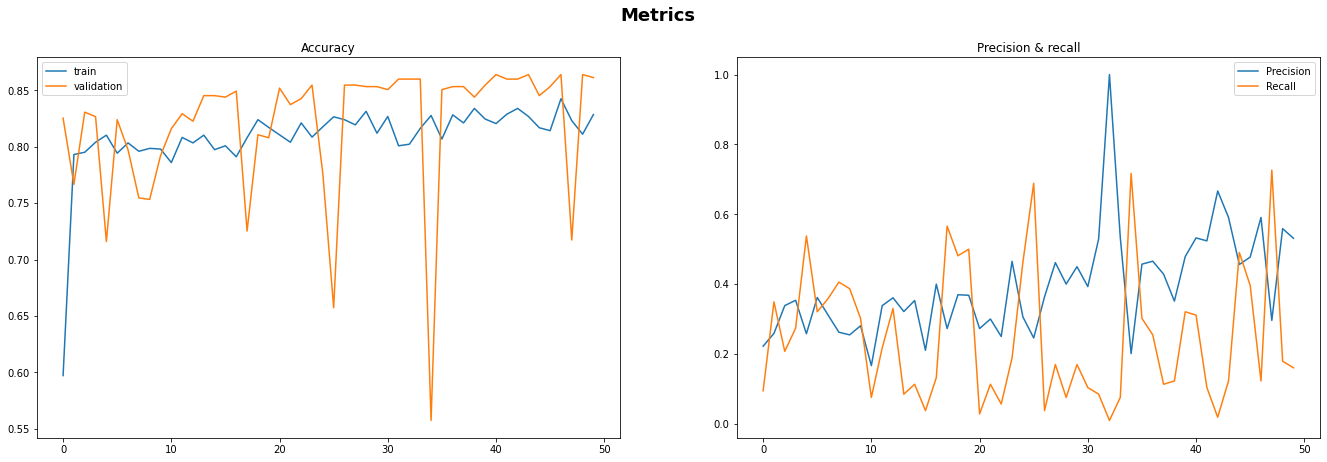

In [10]:
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(23, 7))

ax1.plot(history.history['accuracy'], label='train')
ax1.plot(history.history['val_accuracy'], label='validation')
ax1.set_title('Accuracy')
ax2.plot(history.history['val_precision_1'], label='Precision')
ax2.plot(history.history['val_recall_1'], label='Recall')
ax2.set_title('Precision & recall')
#ax2.plot(history.history['val_true_positives'], label='True positives')

plt.suptitle('Metrics', fontsize=18, fontweight='bold')
#plt.xticks(range(epo))
ax1.legend()
ax2.legend()
plt.show()

In [11]:
y_pred = model.predict(x_test)
y_pred

array([[2.34892704e-02],
       [1.08897511e-03],
       [8.04423908e-05],
       [1.40402997e-02],
       [1.08761145e-02],
       [2.17154855e-03],
       [2.91250408e-01],
       [3.22460942e-03],
       [9.15719755e-03],
       [2.94417322e-01],
       [6.36998378e-03],
       [2.89376272e-04],
       [7.05004903e-03],
       [2.28385273e-02],
       [8.05224990e-04],
       [7.59120565e-03],
       [9.15623829e-02],
       [7.09142685e-02],
       [2.36376688e-01],
       [2.18823493e-01],
       [1.64830722e-02],
       [1.56328932e-03],
       [1.74552828e-04],
       [1.28275990e-01],
       [2.40306789e-03],
       [5.69526106e-03],
       [1.13197893e-04],
       [4.08582211e-01],
       [6.21522497e-03],
       [9.72488255e-04],
       [2.56709248e-01],
       [8.30926746e-02],
       [1.50017836e-03],
       [5.05322649e-04],
       [1.68144718e-01],
       [2.17322297e-02],
       [2.58329809e-02],
       [9.01495223e-04],
       [1.67397112e-02],
       [1.13290772e-02],


In [12]:
import numpy as np

threshold = 0.5
y_pred = np.where(y_pred<=threshold, 0, 1)



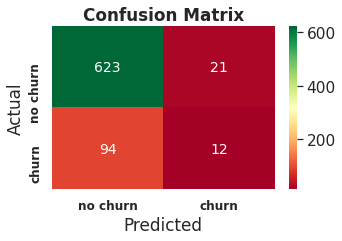

In [13]:
plot_confusion_matrix(y_test, y_pred, cmap='RdYlGn', normalize=None)

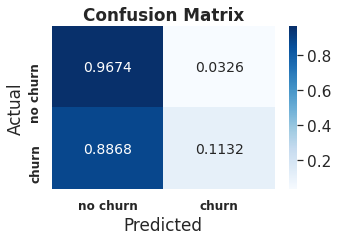

In [14]:
plot_confusion_matrix(y_test, y_pred, cmap='Blues')

In [15]:
print_classification_report(y_test, y_pred)


Classification report:
               precision    recall  f1-score   support

           0       0.87      0.97      0.92       644
           1       0.36      0.11      0.17       106

    accuracy                           0.85       750
   macro avg       0.62      0.54      0.54       750
weighted avg       0.80      0.85      0.81       750

